# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

import pycountry
import plotly.graph_objects as go

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"The shape of the dataset is: {df_data.shape}")
print(f"There are {df_data.isna().values.sum()} NaN values.")
print(f"There are {df_data.duplicated().values.sum()} duplicate rows.")
df_data.info()

The shape of the dataset is: (4324, 9)
There are 3360 NaN values.
There are 0 duplicate rows.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df_data.sample(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4037,4037,4037,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Sat Jun 06, 1964 06:00 UTC",Cosmos-2I (63S1) | Cosmos 31,StatusRetired,NaN,Success
714,714,714,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Sat Aug 14, 2010 11:07 UTC",Atlas V 531 | AEHF-1,StatusActive,140.0,Success
2584,2584,2584,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Mon Jun 12, 1978 10:30 UTC",Soyuz U | Cosmos 1022,StatusRetired,NaN,Success
3153,3153,3153,RVSN USSR,"Site 86/1, Kapustin Yar, Russia","Thu Apr 19, 1973 10:20 UTC",Cosmos-2I (63SM) | Intercosmos-9,StatusRetired,NaN,Success
339,339,339,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Jun 28, 2017 21:15 UTC","Ariane 5 ECA | Hellas Sat 3-Inmarsat S EAN, GS...",StatusActive,200.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_data = df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
# Figure out which column/columns has/have the NaN values
df_data.isna().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Since the only column with missing data is the "Price" column, I'll keep those rows in for the time being, and only drop them when the time comes to answer questions related to the price of the missions.

## Descriptive Statistics

In [10]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [11]:
organisation_count = df_data.Organisation.value_counts()

fig = px.bar(organisation_count,
             x=organisation_count.values,
             y=organisation_count.index,
             title="Space Mission Launches by Organisation",
             color=organisation_count.index)

fig.update_layout(xaxis_title="Number of Launches")

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [12]:
rocket_status = df_data.Rocket_Status.value_counts()

# Dictionary to customise labels as to make them more readable
labels = {"StatusRetired": "Retired",
          "StatusActive": "Active"}

rocket_status.index = rocket_status.index.map(labels)

fig = px.pie(rocket_status,
             values=rocket_status.values,
             names=rocket_status.index,
             title="Active vs Retired Rockets")

fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [13]:
mission_status = df_data.Mission_Status.value_counts()
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [14]:
fig = px.bar(mission_status,
             x=mission_status.index,
             y=mission_status.values,
             title="Distribution of Mission Status",
             color=mission_status.index,
             labels={"Mission_Status": "Mission Status",
                     "y": "Number of Missions"})

fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [15]:
# Drop the NaN values from the dataset because they all were in the "Price" column
price_df = df_data.dropna()
print(price_df.shape)
price_df.sample(5)

(964, 7)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
953,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Tue Jul 26, 2005 14:39 UTC",Space Shuttle Discovery | STS-114,StatusRetired,450.0,Success
960,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...","Thu May 05, 2005 04:45 UTC",PSLV-G | Cartosat-1 & HAMSAT,StatusRetired,25.0,Success
1716,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jan 22, 1992 14:52 UTC",Space Shuttle Discovery | STS-42,StatusRetired,450.0,Success
1755,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 28, 1991 11:33 UTC",Space Shuttle Discovery | STS-39,StatusRetired,450.0,Success
540,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Sep 11, 2014 22:05 UTC","Ariane 5 ECA | MEASAT 3b, Optus 10",StatusActive,200.0,Success


In [16]:
# Type conversion on "Price" column to allow for comparison
price_df.Price = price_df.Price.astype(str).str.replace(",", "")
price_df.Price = pd.to_numeric(price_df.Price)
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    964 non-null    object 
 1   Location        964 non-null    object 
 2   Date            964 non-null    object 
 3   Detail          964 non-null    object 
 4   Rocket_Status   964 non-null    object 
 5   Price           964 non-null    float64
 6   Mission_Status  964 non-null    object 
dtypes: float64(1), object(6)
memory usage: 60.2+ KB


/var/folders/1r/f78n5tg13g5gk9xtphr0_nrh0000gn/T/ipykernel_3902/3554663599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1r/f78n5tg13g5gk9xtphr0_nrh0000gn/T/ipykernel_3902/3554663599.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



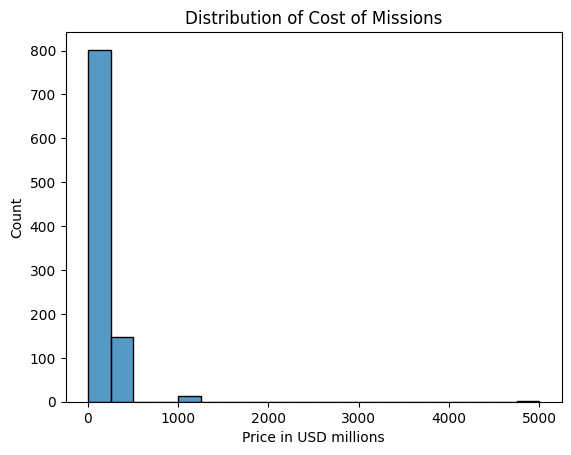

In [17]:
sns.histplot(price_df,
             x=price_df.Price,
             bins=20)

plt.xlabel("Price in USD millions")
plt.title("Distribution of Cost of Missions")

plt.show()

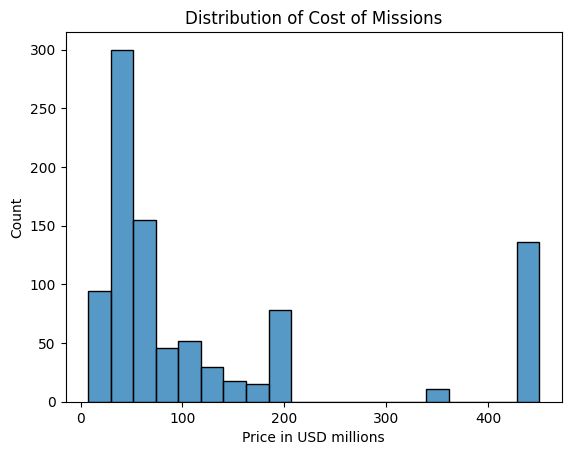

In [18]:
# Clean outliers to better visualise the bulk of the data
no_outliers_price_df = price_df[(price_df.Price >= (price_df.Price.quantile(0.025))) & 
                                (price_df.Price <= (price_df.Price.quantile(0.975)))]

sns.histplot(no_outliers_price_df,
             x=no_outliers_price_df.Price,
             bins=20)

plt.xlabel("Price in USD millions")
plt.title("Distribution of Cost of Missions")

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [19]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]
df_data.sample(5)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
3794,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Mon Mar 13, 1967 12:10 UTC",Vostok-2 | Cosmos 147,StatusRetired,NaN,Success,Russia
1880,Arianespace,"ELA-1, Guiana Space Centre, French Guiana, France","Wed Jul 12, 1989 00:14 UTC",Ariane 3 | Olympus-1,StatusRetired,NaN,Success,France
3307,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Oct 07, 1971 12:30 UTC",Voskhod | Cosmos 443,StatusRetired,NaN,Success,Russia
2732,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Feb 26, 1977 21:18 UTC",Vostok-2M | Cosmos 895,StatusRetired,NaN,Success,Russia
3042,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed May 15, 1974 08:30 UTC",Soyuz U | Cosmos 652,StatusRetired,NaN,Success,Kazakhstan


In [20]:
df_data.replace({"Country": {"New Mexico": "USA",
                             "Yellow Sea": "China",
                             "Shahrud Missile Test Site": "Iran",
                             "Pacific Missile Range Facility": "USA",
                             "Barents Sea": "Russia",
                             "Gran Canaria": "USA"}}, 
                inplace=True)

In [21]:
df_data.Country.value_counts()

Country
Russia           1398
USA              1351
Kazakhstan        701
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
New Zealand        13
Israel             11
Kenya               9
Australia           6
North Korea         5
South Korea         3
Brazil              3
Name: count, dtype: int64

In [22]:
iso_codes = []

# Create list of ISO codes and add that to the dataset as a new column
for country in df_data["Country"]:
    try:
        info = pycountry.countries.search_fuzzy(country)
    except Exception:
        iso_codes.append(np.nan)
    else:
        iso_codes.append(info[0].alpha_3)

df_data["ISO"] = iso_codes

In [23]:
df_data.sample(5)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
908,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Fri Aug 11, 2006 22:15 UTC",Ariane 5 ECA | JCSAT-10 & Syracuse 3B,StatusActive,200.0,Success,France,FRA
1449,VKS RF,"Site 132/1, Plesetsk Cosmodrome, Russia","Wed Apr 24, 1996 13:00 UTC",Cosmos-3M (11K65M) | Cosmos 2265,StatusRetired,NaN,Success,Russia,RUS
1910,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Dec 22, 1988 14:15 UTC",Molniya-M /Block ML | Molniya-3 n†­135,StatusRetired,NaN,Success,Russia,RUS
1101,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Fri Mar 29, 2002 01:29 UTC","Ariane 44L | Astra 3A, JCSAT-8",StatusRetired,NaN,Success,France,FRA
3965,General Dynamics,"LC-576B3, Vandenberg AFB, California, USA","Fri May 28, 1965 02:54 UTC",Atlas-D OV1 | OV1-3,StatusRetired,NaN,Failure,USA,USA


In [24]:
launches_by_country = df_data.groupby(["Country", "ISO"], as_index=False).agg({"Mission_Status": pd.Series.count})
launches_by_country.sort_values("Mission_Status", ascending=False)

,Country,ISO,Mission_Status
12,Russia,RUS,1398
14,USA,USA,1351
8,Kazakhstan,KAZ,701
3,France,FRA,303
2,China,CHN,269
7,Japan,JPN,126
4,India,IND,76
5,Iran,IRN,14
10,New Zealand,NZL,13
6,Israel,ISR,11


In [46]:
fig = go.Figure(data=go.Choropleth(locations=launches_by_country["ISO"],
                                   z=launches_by_country["Mission_Status"],
                                   text=launches_by_country["Country"],
                                   colorscale="matter",
                                   colorbar_title = "Number of Missions"))

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
failures_by_country = df_data[df_data["Mission_Status"] == "Failure"]

failures_by_country = failures_by_country.groupby(["Country", "ISO"], as_index=False).agg({"Mission_Status": pd.Series.count})
failures_by_country.sort_values("Mission_Status", ascending=False)

,Country,ISO,Mission_Status
13,USA,USA,129
8,Kazakhstan,KAZ,72
11,Russia,RUS,63
2,China,CHN,19
3,France,FRA,13
7,Japan,JPN,10
4,India,IND,8
5,Iran,IRN,8
0,Australia,AUS,3
10,North Korea,PRK,3


In [26]:
fig = go.Figure(data=go.Choropleth(locations=failures_by_country["ISO"],
                                   z=failures_by_country["Mission_Status"],
                                   text=failures_by_country["Country"],
                                   colorscale="matter",
                                   colorbar_title = "Number of Failures"))

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [38]:
# I'm using "Rocket_Status" purely as a placeholder so I can get a count on each organisation's Mission Status

country_org_mission = df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).agg({"Rocket_Status": pd.Series.count})
country_org_mission.sort_values("Mission_Status", inplace=True)
country_org_mission

,Country,Organisation,Mission_Status,Rocket_Status
131,USA,Virgin Orbit,Failure,1
35,Israel,IAI,Failure,2
37,Japan,ISAS,Failure,3
115,USA,Northrop,Failure,7
40,Japan,JAXA,Failure,1
...,...,...,...,...
58,Kazakhstan,RVSN USSR,Success,495
54,Kazakhstan,OKB-586,Success,2
53,Kazakhstan,Land Launch,Success,6
68,New Zealand,Rocket Lab,Success,11


In [40]:
fig = px.sunburst(country_org_mission,
                  path=[country_org_mission.Country, country_org_mission.Organisation, country_org_mission.Mission_Status],
                  values=country_org_mission.Rocket_Status,
                  title="Distribution of Mission Status by Organisation in Each Country")

fig.update_layout(xaxis_title="Mission Status",
                  yaxis_title="Organisation",
                  coloraxis_showscale=False)

fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 